<a href="https://colab.research.google.com/github/SteffanBurnette/TensorFlow-/blob/Intro-to-Classification/Machine_learning_assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Assignment Details
The data table has **6 columns** and **11,000 rows** (samples). The first 5 columns are the features
(X) and the last column is the target label (y). The labels have 2 values (0 and 1). Please use
Pandas and Numpy to prepare the data.
* Your target is to train an **as-better-as-possible model** for predicting the label given the features
using Scikit-Learn.
* Hold out **1,000 samples** as your **test set**.
* You have to try at least **3 different models**. You should also fine-tune your model by using grid
search.
* Evaluate your model performance by using **cross-validation**.
* Final test your model on the test set.
* Write a short report (about 2 pages) of your experiment results with your code as an **appendix**
using **LATEX**.
* In the report, you should analyze your results by using **confusion matrices**, **F1 scores**, etc. Discuss
your findings or insights in the last section.
* You can compete to win bonus points in the hidden test sets (2 points). The best 10 students
will get an extra 3 points. And the winner will get 5 points extra.


#The Dataset
The Dataset is extremlely clean. There are no missing values(No columns with no values or **N/A** values), no wrong data (rows with data in columns that dont match the structure of the rest of the rows), no string data (since theres no strings, there no need to use an **encoder** and **column transformer** to convert the string value to an integer representation), and there is no need to **normalize/scale** the data(The dataset is fully within the range of 0-1, so there is no need to use something like the **MinMaxScaler**).

Overall, all that needs to be done is to find a model that will allow me to properly predict the **labels**.

The strategies that will be used are:
* **Cross validation** to properly evaluate the model's performance.
* **GridSearch** to help with that process

This is the normal dataset being downloaded.

In [1]:
#Download rhe csv files from the url given
!wget https://www.cs.csi.cuny.edu/~chen/412/a2.csv.txt

--2024-03-20 16:37:42--  https://www.cs.csi.cuny.edu/~chen/412/a2.csv.txt
Resolving www.cs.csi.cuny.edu (www.cs.csi.cuny.edu)... 163.238.35.144
Connecting to www.cs.csi.cuny.edu (www.cs.csi.cuny.edu)|163.238.35.144|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 297000 (290K) [text/plain]
Saving to: ‘a2.csv.txt’

a2.csv.txt          100%[===================>] 290.04K  --.-KB/s    in 0.08s   

2024-03-20 16:37:42 (3.60 MB/s) - ‘a2.csv.txt’ saved [297000/297000]



This is the **hidden** dataset being downloaded to be used on and review predictions after I train with the normal dataset. From taking a brief glance at the data i can see that it is already **normalized/scaled**(that is, the **features** are between 0-1)

In [2]:
!wget https://www.cs.csi.cuny.edu/~chen/412/a1_test.csv.txt

--2024-03-20 16:37:44--  https://www.cs.csi.cuny.edu/~chen/412/a1_test.csv.txt
Resolving www.cs.csi.cuny.edu (www.cs.csi.cuny.edu)... 163.238.35.144
Connecting to www.cs.csi.cuny.edu (www.cs.csi.cuny.edu)|163.238.35.144|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25000 (24K) [text/plain]
Saving to: ‘a1_test.csv.txt’

a1_test.csv.txt     100%[===================>]  24.41K  --.-KB/s    in 0.02s   

2024-03-20 16:37:44 (1.21 MB/s) - ‘a1_test.csv.txt’ saved [25000/25000]



#Import the libaries need to load, split and preprocess the dataset

In [5]:
import tensorflow as tf #Construct the neural network
import numpy as np  #performs statistical analysis
import pandas as pd #Easily stores and augments data
import matplotlib.pyplot as plt #Plots and visualizes data
from sklearn.model_selection import train_test_split #Create test and train sets
import random #Sets the random seed
import matplotlib.pyplot as plt

#Load in the dataset we will be using

In [4]:
column_names = ['Column1', 'Column2', 'Column3', 'Column4', 'Column5', "Column6"]
#Loads in the base dataset and split the features and labels
base_dataset = pd.read_csv("/content/a2.csv.txt", names = column_names)
base_dataset.head()
#print(base_dataset["1"].head())
base_labels = base_dataset["Column6"]
base_labels.head()


0    1
1    1
2    1
3    0
4    0
Name: Column6, dtype: int64

From analyzing the plot, this dataset is uniform meaning that the data is **homogeneous** or **consistent** in format and type.

* All data entries are structured in the same way
* The data within each column or field is of the same type.
* The uniform dataset has no missing values, or missing values are handled consistently across the dataset
* A uniform distribution means that all values in the dataset are equally likely to occur.

**SVMs** are effective in high-dimensional spaces, even when the number of dimensions is greater than the number of samples. This makes them well-suited for uniform datasets with a lot of features.

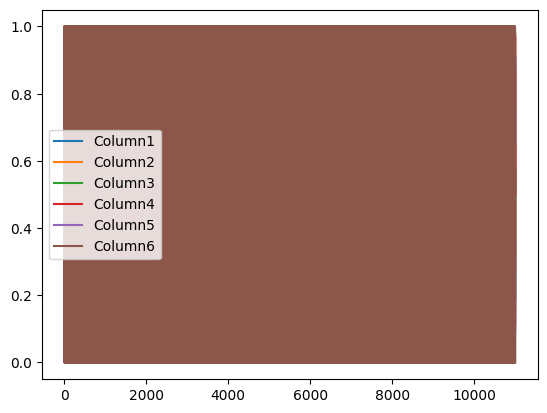

In [6]:
base_dataset.plot()
plt.show()

In [ ]:
#Drops the labels and leaves only the features
base_dataset = base_dataset.drop(columns = "Column6")
base_dataset.head()

,Column1,Column2,Column3,Column4,Column5
0,0.58,0.33,0.05,0.34,0.04
1,0.68,0.59,0.73,0.87,0.32
2,0.75,0.74,0.56,0.06,0.86
3,0.55,0.47,0.85,0.12,0.03
4,0.67,0.72,0.53,0.56,0.77


Now that i've seperated the features and labels, I will create training and testing datasets using the **train_test_split** method. I set the random state to 42, and will continue to do so for random reproducibility.

In [ ]:
X_train, Y_train, x_test, y_test = train_test_split(base_dataset,
                                                    base_labels,
                                                    test_size = 0.1,
                                                    random_state=42)
#Viewing the datasets to make sure that they were split properly
X_train.head(), x_test.head()

(      Column1  Column2  Column3  Column4  Column5
 4842     0.43     0.03     0.54     0.24     0.51
 1952     0.01     0.63     0.03     0.24     0.87
 8097     0.26     0.87     0.16     0.08     0.39
 713      0.97     0.93     0.24     0.83     0.39
 1579     0.14     0.79     0.78     0.70     0.11,
 4842    0
 1952    1
 8097    1
 713     0
 1579    0
 Name: Column6, dtype: int64)

In [ ]:
Y_train.head(), y_test.head()

(      Column1  Column2  Column3  Column4  Column5
 107      0.92     0.25     0.42     0.26     0.05
 5484     0.64     0.86     0.14     0.72     0.21
 6998     0.86     0.20     0.06     0.52     0.18
 3984     0.95     0.34     0.64     0.20     0.01
 3111     0.97     0.68     0.31     0.27     0.22,
 107     1
 5484    0
 6998    0
 3984    1
 3111    0
 Name: Column6, dtype: int64)

#Workflow for takling this data
This is a **binary classification** problem where we are given five **features** and have to predict on **label/output**. I will first use tensorflow to construct the neral network from scratch and then look for areas of improvement while treating that first model as the **baseline**.

In [ ]:
from tensorflow.keras.layers import Dense, Input #The layers of the first model
from tensorflow.keras import Model #used to create the model
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler #Used to normalize the data

First I will perform **normalization** on the data so that the neural network can perform better on it. I will do so using the **MinMaxScaler** which will set all the values within the same range while maintaining the distribution.

In [ ]:
#Only need to normalize the features not the labels
scaler = MinMaxScaler()
X_train_norm = scaler.fit_transform(X_train)
scalerY = MinMaxScaler()
Y_train_norm = scalerY.fit_transform(Y_train)
X_train_norm, Y_train_norm

(array([[0.43, 0.03, 0.54, 0.24, 0.51],
        [0.01, 0.63, 0.03, 0.24, 0.87],
        [0.26, 0.87, 0.16, 0.08, 0.39],
        ...,
        [0.88, 0.49, 0.97, 0.89, 0.4 ],
        [0.03, 0.51, 0.92, 0.71, 0.5 ],
        [0.93, 0.42, 0.2 , 0.37, 0.73]]),
 array([[0.92, 0.25, 0.42, 0.26, 0.05],
        [0.64, 0.86, 0.14, 0.72, 0.21],
        [0.86, 0.2 , 0.06, 0.52, 0.18],
        ...,
        [0.88, 0.88, 0.36, 0.63, 0.33],
        [0.22, 0.83, 0.8 , 0.74, 0.1 ],
        [0.49, 0.52, 0.32, 0.45, 0.69]]))

The first mode that i will be building is a **sequential** model with **fully connected layers (Dense)** that will output one value at the end(the predicted label)

In [ ]:
model_1 = Sequential([
    Dense(100, activation="relu"), #Uses the relu activation function to introduce non linearity
    Dense(10, activation = "relu"),
    Dense(1, activation = "sigmoid", name = "output_layer") #Sigmoid activation function since there are only 2 classes
])

In [ ]:
model_1.compile(loss = tf.keras.losses.BinaryCrossentropy(), #Uses the binary cross entropy for the binary classification
                optimizer = tf.keras.optimizers.Adam(), #Uses the default learning rate of the adam optimizer 0.01
                metrics = ["accuracy"]) #Uses accuracy as the metric

In [ ]:
history_1 = model_1.fit(X_train, x_test, epochs = 5, steps_per_epoch = len(X_train),
                        validation_data = (Y_train, y_test), validation_steps = len(Y_train))

Epoch 1/5
9899/9899 [==============================] - 47s 4ms/step - loss: 0.6340 - accuracy: 0.6381 - val_loss: 0.5855 - val_accuracy: 0.6909
Epoch 2/5
9899/9899 [==============================] - 39s 4ms/step - loss: 0.5715 - accuracy: 0.7061 - val_loss: 0.5405 - val_accuracy: 0.7373
Epoch 3/5
9899/9899 [==============================] - 38s 4ms/step - loss: 0.5320 - accuracy: 0.7346 - val_loss: 0.5218 - val_accuracy: 0.7400
Epoch 4/5
9899/9899 [==============================] - 36s 4ms/step - loss: 0.5061 - accuracy: 0.7536 - val_loss: 0.4918 - val_accuracy: 0.7573
Epoch 5/5
9899/9899 [==============================] - 38s 4ms/step - loss: 0.4831 - accuracy: 0.7667 - val_loss: 0.4717 - val_accuracy: 0.7773


In [ ]:
#Lets create a function to plot our loss curves
#Note that this function will fail if we are using an evaluation metric that is not accuracy
#Plot the validation and training curves seperately
def plot_loss_curves(history):
  """
  Returns seperate loss curves for training and validation metrics
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]
  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"])) #How many epochs did we run for

  #Plot loss
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs,val_loss, label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

    #Plot Accuracy
  plt.figure() #Creates a new figure
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs,val_accuracy, label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

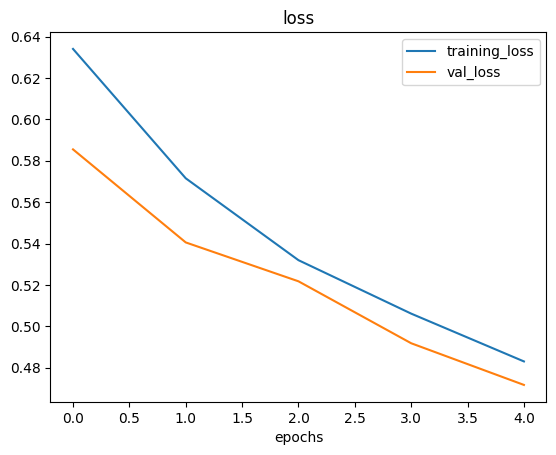

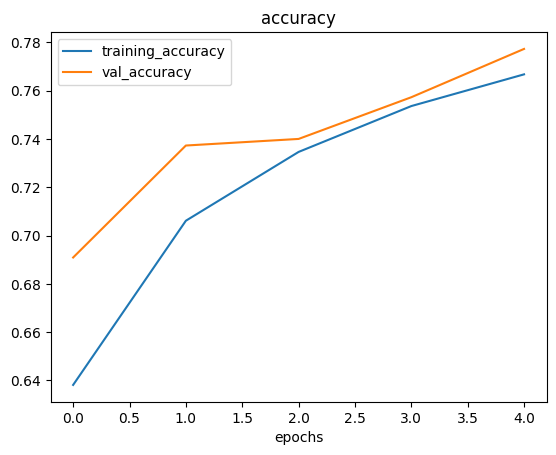

In [ ]:
plot_loss_curves(history_1)

In [ ]:
model_1.evaluate(Y_train, y_test)

35/35 [==============================] - 0s 3ms/step - loss: 0.4717 - accuracy: 0.7773


[0.4717143177986145, 0.7772727012634277]

**`Model_1`** Came out will an accuracy rate of 77%. I feel like i could do better so here are some experiments that i will try:
* Train for longer(more epochs)
* Find the ideal learning rate
* Make the model more complex
* Train on normalized data

In [ ]:
model_2 = Sequential([
    Dense(100, activation = "relu"),
    Dense(50, activation = "relu"),
    Dense(10, activation = "relu"),
    Dense(1, activation = "sigmoid")
])

model_2.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

In [ ]:
history_2 = model_2.fit(X_train, x_test, epochs = 5, steps_per_epoch = len(X_train),
            validation_data = (Y_train, y_test), validation_steps = len(Y_train))

Epoch 1/5
9899/9899 [==============================] - 40s 4ms/step - loss: 0.6273 - accuracy: 0.6469 - val_loss: 0.5659 - val_accuracy: 0.7127
Epoch 2/5
9899/9899 [==============================] - 44s 4ms/step - loss: 0.5415 - accuracy: 0.7300 - val_loss: 0.5379 - val_accuracy: 0.7264
Epoch 3/5
9899/9899 [==============================] - 35s 4ms/step - loss: 0.4985 - accuracy: 0.7632 - val_loss: 0.5260 - val_accuracy: 0.7427
Epoch 4/5
9899/9899 [==============================] - 39s 4ms/step - loss: 0.4664 - accuracy: 0.7779 - val_loss: 0.4510 - val_accuracy: 0.7818
Epoch 5/5
9899/9899 [==============================] - 33s 3ms/step - loss: 0.4332 - accuracy: 0.8005 - val_loss: 0.4405 - val_accuracy: 0.7936


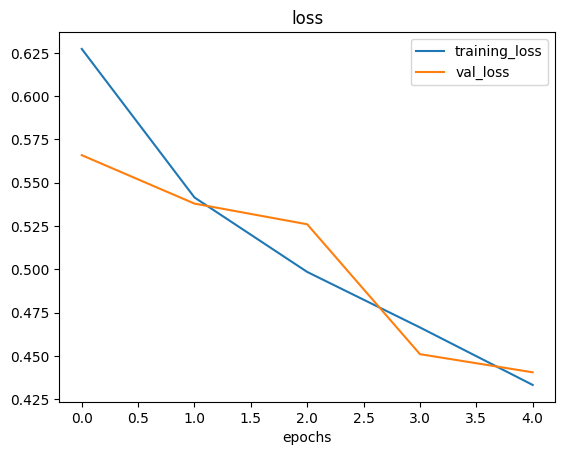

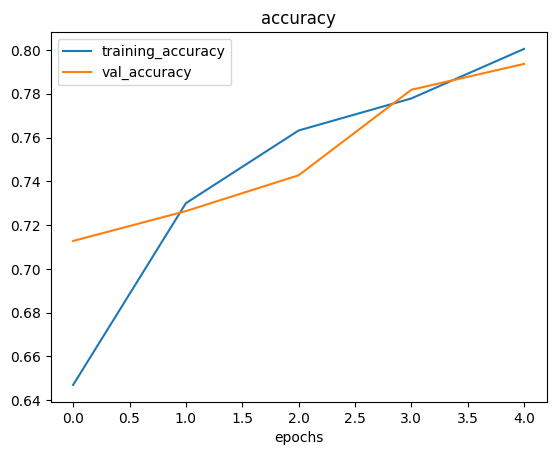

In [ ]:
plot_loss_curves(history_2)

In [ ]:
model_2.evaluate(Y_train, y_test)

35/35 [==============================] - 0s 3ms/step - loss: 0.4405 - accuracy: 0.7936


[0.4404865503311157, 0.7936363816261292]

Adding more layers seemed to have helped the models performance as it was able to hit 80% val accuracy BUT, i looks like the model was trained for to long since it started to overfit around the 3rd epoch causing is accuracy to decline.

For the next experiment, i will remove some neurons and decrease the learning rate before feeding data to the model.

#Measuring models results with precision, recall, f1score and accuracy
To gain more insight into my models performance I will take the metrics of the **precision**, **recall**, **f1score** and **accuracy** by using the **`precision_recall_fscore_support`** function.

In [ ]:
#Function to evaluate: Accuracy, Precision, Recall, F1-Score
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):
  """
  Calculates models accuracy, precision, recall and f1-score of a binary classification model
  """
  #Calculate model accuracy
  model_accuracy = accuracy_score(y_true, y_pred) * 100
  #Calculate models precision, recall, f1score using "weighted" average
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average = "weighted")
  #Finally, store all the calculations in a dictionary
  model_results = {
      "Accuracy":model_accuracy,
      "Precision":model_precision,
      "Recall":model_recall,
      "F1-Score":model_f1
  }
  return model_results

In [ ]:
#Store the predictions and view their metrics
model_2_preds = model_2.predict(Y_train)
#Round the prediction probabilities to the nearst point/label
model_2_results = calculate_results(y_test, tf.round(model_2_preds))
print(model_2_results)

35/35 [==============================] - 0s 2ms/step
{'Accuracy': 79.36363636363636, 'Precision': 0.8007774583698828, 'Recall': 0.7936363636363636, 'F1-Score': 0.7934956470853697}


The results are telling. Everything has a universal socre of 79% for `model_2` which is better performance than `model_1`, but my goal is atleast 90%. I will try to mess around with the learning rate next to see if there is any improvement. I will also plot the **confusion matrix** to better visualize my findings.

To improve the model to maximize accuracy and the other metrics that will be measured I am going to use the **learning rate scheduler** to decay the learning rate after every **epoch** so that we can avoid **overfitting** and potentially improve the accuracy of the model. The goal for this assignment is still 90%ish or above.

In [ ]:
from tensorflow.keras.callbacks import LearningRateScheduler
#One method to define a dynamic decaying learning rate
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-4*10**(epoch/20))

In [ ]:
#Exponetial Decay
def scheduler(epoch, lr):
  if epoch <= 3:
    return lr #Uses the same set learning rate for the first 3 epochs
  else:
    return lr * tf.math.exp(-0.1) #Exponetially decays the learning rate once you are past your third epoch


In [ ]:
#Testing the learner rate scheduler function to visulaize what is hapening during the training process
lr = 0.01
for i in range(10):
  lr = scheduler(i, lr)
  print(i, lr)

0 0.01
1 0.01
2 0.01
3 0.01
4 tf.Tensor(0.009048373, shape=(), dtype=float32)
5 tf.Tensor(0.008187306, shape=(), dtype=float32)
6 tf.Tensor(0.0074081807, shape=(), dtype=float32)
7 tf.Tensor(0.006703199, shape=(), dtype=float32)
8 tf.Tensor(0.006065305, shape=(), dtype=float32)
9 tf.Tensor(0.0054881144, shape=(), dtype=float32)


🔐**Side_Note** - Instead of predicting the price that a stock will close at, create a **binary classifier** that will predict if the stock closes on a high (will be denoted to 1) or if it closes on a low(will be denoted to 0).

Now lets see if we can improve the models performance by dynamically decaying the learning rate as the model trains.

In [ ]:
model_3 = Sequential([
    Dense(100, activation = "relu"),
    Dense(50, activation = "relu"),
    Dense(10, activation = "relu"),
    Dense(1, activation = "sigmoid")
])

model_3.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

In [ ]:
history_3 = model_3.fit(X_train, x_test, epochs = 5, steps_per_epoch = len(X_train),
            validation_data = (Y_train, y_test), validation_steps = len(Y_train),
                        callbacks = [lr_scheduler])

Epoch 1/5
9899/9899 [==============================] - 46s 5ms/step - loss: 0.6692 - accuracy: 0.5846 - val_loss: 0.6519 - val_accuracy: 0.6091 - lr: 1.0000e-04
Epoch 2/5
9899/9899 [==============================] - 46s 5ms/step - loss: 0.6288 - accuracy: 0.6543 - val_loss: 0.6040 - val_accuracy: 0.6727 - lr: 1.1220e-04
Epoch 3/5
9899/9899 [==============================] - 42s 4ms/step - loss: 0.5979 - accuracy: 0.6856 - val_loss: 0.5780 - val_accuracy: 0.6964 - lr: 1.2589e-04
Epoch 4/5
9899/9899 [==============================] - 43s 4ms/step - loss: 0.5737 - accuracy: 0.7068 - val_loss: 0.5608 - val_accuracy: 0.7100 - lr: 1.4125e-04
Epoch 5/5
9899/9899 [==============================] - 35s 4ms/step - loss: 0.5517 - accuracy: 0.7204 - val_loss: 0.5327 - val_accuracy: 0.7309 - lr: 1.5849e-04


It seems like the first learner rate scheduler was not the best so i will try to make a second one.

In [ ]:
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(scheduler)


In [ ]:
model_4 = Sequential([
    Dense(100, activation = "relu"),
    Dense(50, activation = "relu"),
    Dense(10, activation = "relu"),
    Dense(1, activation = "sigmoid")
])

model_4.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

In [ ]:
history_4 = model_4.fit(X_train, x_test, epochs = 5, steps_per_epoch = len(X_train),
            validation_data = (Y_train, y_test), validation_steps = len(Y_train),
                        callbacks = [lr_scheduler])

Epoch 1/5
9899/9899 [==============================] - 49s 5ms/step - loss: 0.6299 - accuracy: 0.6403 - val_loss: 0.5594 - val_accuracy: 0.7091 - lr: 0.0010
Epoch 2/5
9899/9899 [==============================] - 49s 5ms/step - loss: 0.5474 - accuracy: 0.7256 - val_loss: 0.5182 - val_accuracy: 0.7455 - lr: 0.0010
Epoch 3/5
9899/9899 [==============================] - 41s 4ms/step - loss: 0.5009 - accuracy: 0.7577 - val_loss: 0.4690 - val_accuracy: 0.7709 - lr: 0.0010
Epoch 4/5
9899/9899 [==============================] - 37s 4ms/step - loss: 0.4649 - accuracy: 0.7752 - val_loss: 0.4891 - val_accuracy: 0.7645 - lr: 0.0010
Epoch 5/5
9899/9899 [==============================] - 51s 5ms/step - loss: 0.4306 - accuracy: 0.8018 - val_loss: 0.4013 - val_accuracy: 0.8082 - lr: 9.0484e-04


This looks great, the model has hit a high of 81% BUT I think that it can go higher. I will keep everything the same for the next test but train for a little longer to see if theres improvements.

In [ ]:
model_5 = Sequential([
    Dense(100, activation = "relu"),
    Dense(50, activation = "relu"),
    Dense(10, activation = "relu"),
    Dense(1, activation = "sigmoid")
])

model_5.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

I will implement the **EarlyStopping callback** so that the model can avoid overfitting while choosing to train for longer.

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping #Directly importing the early stopping callback so that i can make an instance of it\

#Create an instance of the early stopping callbadk
early_stopper = EarlyStopping(
    monitor='val_loss',     # Metric to be monitored will be validation accuracy since it shows us how well our model is generalizing
    patience=3,             # Number of epochs with no improvement after which training will be stopped
    min_delta=0.001,        # Minimum change in the monitored quantity to qualify as an improvement
    mode='min',             # In 'min' mode, training will stop when the quantity monitored has stopped decreasing
    verbose=1
)


In [ ]:
history_5 = model_5.fit(X_train, x_test, epochs = 10, steps_per_epoch = len(X_train),
            validation_data = (Y_train, y_test), validation_steps = len(Y_train),
                        callbacks = [lr_scheduler, early_stopper])

Epoch 1/10
9899/9899 [==============================] - 46s 4ms/step - loss: 0.6203 - accuracy: 0.6557 - val_loss: 0.5864 - val_accuracy: 0.6891 - lr: 0.0010
Epoch 2/10
9899/9899 [==============================] - 38s 4ms/step - loss: 0.5336 - accuracy: 0.7370 - val_loss: 0.5187 - val_accuracy: 0.7391 - lr: 0.0010
Epoch 3/10
9899/9899 [==============================] - 41s 4ms/step - loss: 0.4810 - accuracy: 0.7748 - val_loss: 0.4486 - val_accuracy: 0.7882 - lr: 0.0010
Epoch 4/10
9899/9899 [==============================] - 36s 4ms/step - loss: 0.4460 - accuracy: 0.7906 - val_loss: 0.4328 - val_accuracy: 0.7891 - lr: 0.0010
Epoch 5/10
9899/9899 [==============================] - 33s 3ms/step - loss: 0.4106 - accuracy: 0.8109 - val_loss: 0.4246 - val_accuracy: 0.7955 - lr: 9.0484e-04
Epoch 6/10
9899/9899 [==============================] - 32s 3ms/step - loss: 0.3809 - accuracy: 0.8271 - val_loss: 0.3542 - val_accuracy: 0.8336 - lr: 8.1873e-04
Epoch 7/10
9899/9899 [======================

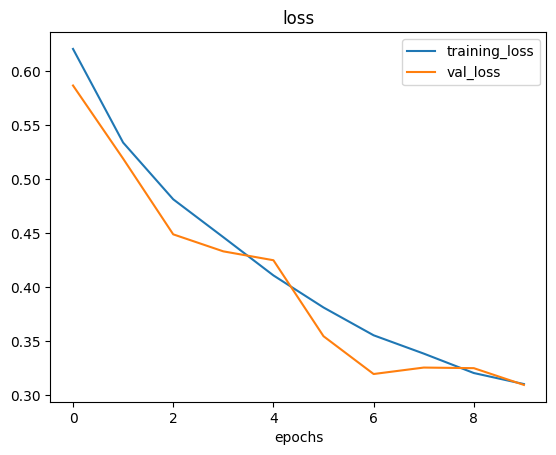

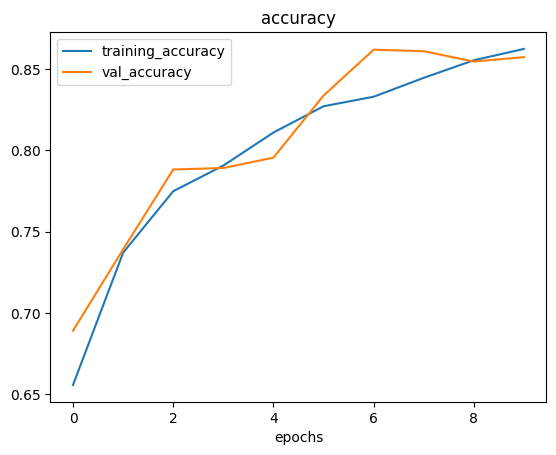

In [ ]:
plot_loss_curves(history_5)

The accuracy is amazing, 85% is the new milestone, but when plotting the loss curves there seems to be some issues near the end. I will calculate the **precision**, **recall** and **f1score** to gain further insight into the models performance.

In [ ]:
#Evaluate the model
model_5.evaluate(Y_train, y_test)

#Get the models predictions
model_5_preds = model_5.predict(Y_train)

#Calculate the precision, recall, and f1score
calculate_results(y_test, tf.round(model_5_preds))

35/35 [==============================] - 0s 2ms/step


{'Accuracy': 85.72727272727273,
 'Precision': 0.8572379206553964,
 'Recall': 0.8572727272727273,
 'F1-Score': 0.857248929744693}

Amazing!!! The **accuracy**, **precision**, **f1score** and **recall** are **85%**. It seems liek training longer will yeild better results, and since I have the **EarlyStopping** callback in place, i can avoid overfitting and allow the model to generalize well. The next test will be me training the model for 16 epochs but keeping its architecture the same.

In [ ]:
model_6 = Sequential([
    Dense(100, activation = "relu"),
    Dense(50, activation = "relu"),
    Dense(10, activation = "relu"),
    Dense(1, activation = "sigmoid")
])

model_6.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

In [ ]:
history_6 = model_6.fit(X_train, x_test, epochs = 16, steps_per_epoch = len(X_train),
            validation_data = (Y_train, y_test), validation_steps = len(Y_train),
                        callbacks = [lr_scheduler, early_stopper])

Epoch 1/16
9899/9899 [==============================] - 34s 3ms/step - loss: 0.6234 - accuracy: 0.6478 - val_loss: 0.6261 - val_accuracy: 0.6609 - lr: 0.0010
Epoch 2/16
9899/9899 [==============================] - 32s 3ms/step - loss: 0.5391 - accuracy: 0.7334 - val_loss: 0.4992 - val_accuracy: 0.7618 - lr: 0.0010
Epoch 3/16
9899/9899 [==============================] - 32s 3ms/step - loss: 0.4934 - accuracy: 0.7633 - val_loss: 0.4796 - val_accuracy: 0.7618 - lr: 0.0010
Epoch 4/16
9899/9899 [==============================] - 33s 3ms/step - loss: 0.4564 - accuracy: 0.7827 - val_loss: 0.4374 - val_accuracy: 0.7982 - lr: 0.0010
Epoch 5/16
9899/9899 [==============================] - 31s 3ms/step - loss: 0.4276 - accuracy: 0.8017 - val_loss: 0.4040 - val_accuracy: 0.8073 - lr: 9.0484e-04
Epoch 6/16
9899/9899 [==============================] - 32s 3ms/step - loss: 0.3982 - accuracy: 0.8167 - val_loss: 0.4002 - val_accuracy: 0.8118 - lr: 8.1873e-04
Epoch 7/16
9899/9899 [======================

In [ ]:
model_6.evaluate(Y_train, y_test)

#Get the models predictions
model_6_preds = model_6.predict(Y_train)

#Calculate the precision, recall, and f1score
calculate_results(y_test, tf.round(model_6_preds))

35/35 [==============================] - 0s 2ms/step


{'Accuracy': 84.0,
 'Precision': 0.8436311561489888,
 'Recall': 0.84,
 'F1-Score': 0.8389018913955577}

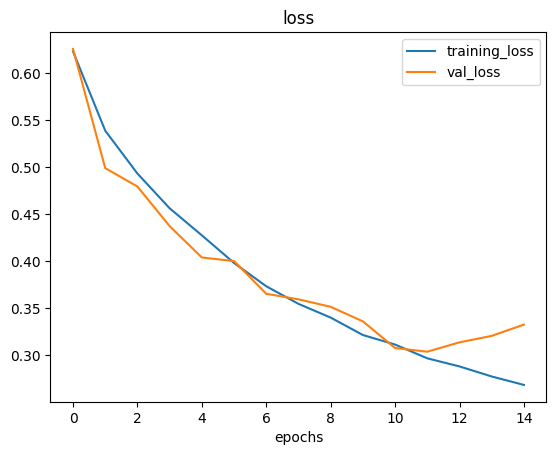

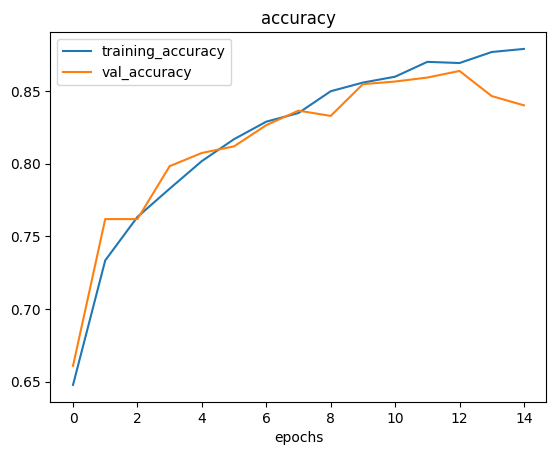

In [ ]:
plot_loss_curves(history_6)

Will train a little shorter, since the model started to overfit on the end

In [ ]:
model_7 = Sequential([
    Dense(100, activation = "relu"),
    Dense(50, activation = "relu"),
    Dense(10, activation = "relu"),
    Dense(1, activation = "sigmoid")
])

model_7.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

In [ ]:
history_7 = model_7.fit(X_train, x_test, epochs = 15, steps_per_epoch = len(X_train),
            validation_data = (Y_train, y_test), validation_steps = len(Y_train),
                        callbacks = [lr_scheduler, early_stopper])

Epoch 1/15
9900/9900 [==============================] - 36s 3ms/step - loss: 0.6736 - accuracy: 0.6018 - val_loss: 0.6563 - val_accuracy: 0.6200 - lr: 1.0000e-04
Epoch 2/15
9900/9900 [==============================] - 33s 3ms/step - loss: 0.6370 - accuracy: 0.6495 - val_loss: 0.6273 - val_accuracy: 0.6473 - lr: 1.1220e-04
Epoch 3/15
9900/9900 [==============================] - 33s 3ms/step - loss: 0.6031 - accuracy: 0.6867 - val_loss: 0.6005 - val_accuracy: 0.6800 - lr: 1.2589e-04
Epoch 4/15
9900/9900 [==============================] - 34s 3ms/step - loss: 0.5745 - accuracy: 0.7038 - val_loss: 0.5864 - val_accuracy: 0.6855 - lr: 1.4125e-04
Epoch 5/15
9900/9900 [==============================] - 32s 3ms/step - loss: 0.5479 - accuracy: 0.7210 - val_loss: 0.5692 - val_accuracy: 0.7164 - lr: 1.5849e-04
Epoch 6/15
9900/9900 [==============================] - 32s 3ms/step - loss: 0.5266 - accuracy: 0.7354 - val_loss: 0.5337 - val_accuracy: 0.7336 - lr: 1.7783e-04
Epoch 7/15
9900/9900 [======

The results are 87% after training this model. 11-14 epochs seems like the best range to avoid overfitting but I will see if I can augment the learning rate to make the model learn slower to avoid overfitting while training for longer.

First, ill redefine the **learning rate scheduler** and the **early_stopper**

In [ ]:
#Create an instance of the early stopping callbadk
early_stopper_v2 = EarlyStopping(
    monitor='val_loss',     # Metric to be monitored will be validation accuracy since it shows us how well our model is generalizing
    patience=2,             # Number of epochs with no improvement after which training will be stopped
    min_delta=0.001,        # Minimum change in the monitored quantity to qualify as an improvement
    mode='min',             # In 'min' mode, training will stop when the quantity monitored has stopped decreasing
    verbose=1
)

#Exponetial Decay
def scheduler_v2(epoch, lr):
  if epoch <= 7:
    return lr #Uses the same set learning rate for the first 3 epochs
  else:
    return lr * tf.math.exp(-0.1) #Exponetially decays the learning rate


lr_scheduler_v2 = tf.keras.callbacks.LearningRateScheduler(scheduler_v2)

In [ ]:
model_8 = Sequential([
    Dense(100, activation = "relu"),
    Dense(50, activation = "relu"),
    Dense(10, activation = "relu"),
    Dense(1, activation = "sigmoid")
])

model_8.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

In [ ]:
history_8 = model_8.fit(X_train, x_test, epochs = 14, steps_per_epoch = len(X_train),
            validation_data = (Y_train, y_test), validation_steps = len(Y_train),
                        callbacks = [lr_scheduler_v2, early_stopper_v2])

Epoch 1/14
9899/9899 [==============================] - 33s 3ms/step - loss: 0.6337 - accuracy: 0.6341 - val_loss: 0.6453 - val_accuracy: 0.6682 - lr: 0.0010
Epoch 2/14
9899/9899 [==============================] - 31s 3ms/step - loss: 0.5533 - accuracy: 0.7135 - val_loss: 0.5203 - val_accuracy: 0.7309 - lr: 0.0010
Epoch 3/14
9899/9899 [==============================] - 32s 3ms/step - loss: 0.5077 - accuracy: 0.7518 - val_loss: 0.4828 - val_accuracy: 0.7764 - lr: 0.0010
Epoch 4/14
9899/9899 [==============================] - 32s 3ms/step - loss: 0.4668 - accuracy: 0.7767 - val_loss: 0.4629 - val_accuracy: 0.7836 - lr: 0.0010
Epoch 5/14
9899/9899 [==============================] - 32s 3ms/step - loss: 0.4390 - accuracy: 0.7924 - val_loss: 0.4697 - val_accuracy: 0.7682 - lr: 0.0010
Epoch 6/14
9899/9899 [==============================] - 32s 3ms/step - loss: 0.4123 - accuracy: 0.8067 - val_loss: 0.3882 - val_accuracy: 0.8173 - lr: 0.0010
Epoch 7/14
9899/9899 [==============================

##Functionizing The Analysis of Model Performance
* Create a function to create **confusion matrices** and **plot confusion matrices**
* Create a function to evaluate the model, make predictions, and get the **accuracy, precision, recall, f1score** (maybe the **specificity** aswell)
* Create a function to perform **Cross Validation** (most likely **Leave-One-Out Cross Validation**)

I might combine points 2 & 3 into a single function if possible.

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_recall_fscore_support
import matplotlib.pyplot as plt

def deep_analysis(model, Y_train, y_true):
  """
  This function will take in a model, the training set to make prediction's on and
  the true values that the model is trying to predict.
  It will caculate and return the accuracy, precision, recall and f1Score metrics of the model's
  predictions in n object to gain further insight into the model's performance.
  The function will also create a confusion matrix and plot it for the user.
  """
  #Gets the model's predictions, rounds to the nearest prediction
  predictions = tf.round(model.predict(Y_train))

  #Calculate model accuracy
  model_accuracy = accuracy_score(y_true, predictions) * 100

  #Calculate models precision, recall, f1score using "weighted" average
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, predictions, average = "weighted")

  print(f"Accuracy: {'{:.2f}'.format(model_accuracy)}% \n Precision: {'{:.2f}'.format(model_precision * 100)}% \n Recall: {'{:.2f}'.format(model_recall * 100)}% \n F1-Score: {'{:.2f}'.format(model_f1 * 100)}% \n")

  #Create the confusion matrix
  con_matrix = confusion_matrix(y_true, predictions)
  #Create's the confusion matrix display object to plot the matrix with
  display = ConfusionMatrixDisplay(confusion_matrix=con_matrix)
  #Plots the confusion matrix so that the user can get a visual representation of it
  display.plot()
  plt.show()

  #Store's all of the metrics and matrix in a dictionary
  model_results = {
      "Accuracy":model_accuracy,
      "Precision":model_precision * 100,
      "Recall":model_recall * 100,
      "F1-Score":model_f1 * 100,
      "Confusion_matrix":con_matrix,
      "Confusion_matrix_display":display
  }

  return model_results




35/35 [==============================] - 0s 2ms/step
Accuracy: 80.09% 
 Precision: 80.22% 
 Recall: 80.09% 
 F1-Score: 80.10% 



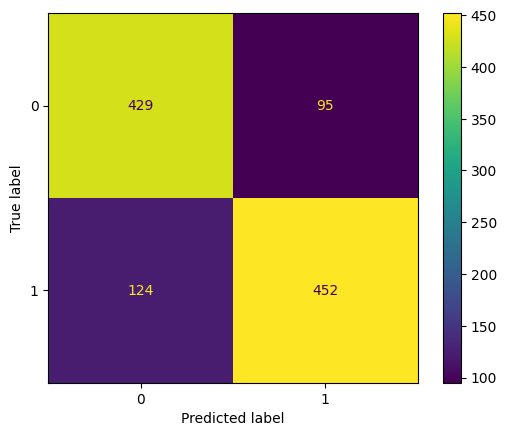

In [ ]:
model_7_results = deep_analysis(model = model_7, Y_train = Y_train, y_true = y_test)

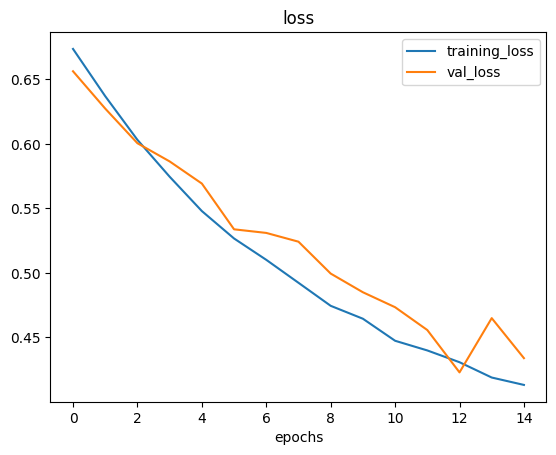

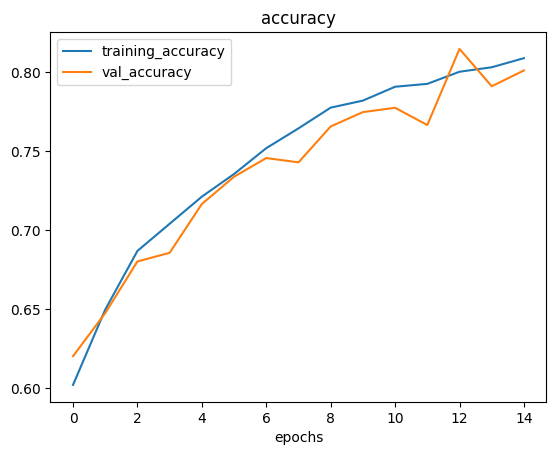

In [ ]:
plot_loss_curves(history_7)

In [ ]:
#Already saved to model once with 89% accuracy, if it performs better then I will uncomment and envoke another save
#model_7.save("csi_ML_assignment2.keras")

During training the model seems to have hopped around a little bit towards the end which is not a good sign, HOWEVER, it seems to have **generalized** well since it got a 89% **accuracy, precision, recall** and **f1-score** on newly unseen data. So, I've decided to save it for now and see if I can create a model that surpasses it, but has more stable **loss curves**.

#Transfer Learning
Next I will implement **transfer learning feature extraction** to see if I can break past the 80's percentile and get into 90%.

The model I plan on taking advantage of is **tf.keras.applications.densenet**

https://www.kaggle.com/datasets/pytorch/densenet121

# @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

The section above is the **deep learning** aspect of thsi project. Below will be the **machine learning** aspect of this project. Instead of hand crafting the **neural networks**, I will be training premade model from the **sklearn** libary and try to surpass the 89% treshold that I am currently at.

First ill test out the **DecisionTreeClassifier** to see how accuracy it is in its predicting.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
#For the first tree, I will not set the max depth
dtc = DecisionTreeClassifier(random_state = 42)
dtc.fit(X_train, x_test)

DecisionTreeClassifier(random_state=42)

In [ ]:
tree_preds = dtc.predict(Y_train)
tree_preds

array([0, 0, 1, ..., 0, 0, 0])

Accuracy: 79.82% 
 Precision: 79.81% 
 Recall: 79.82% 
 F1-Score: 79.80% 



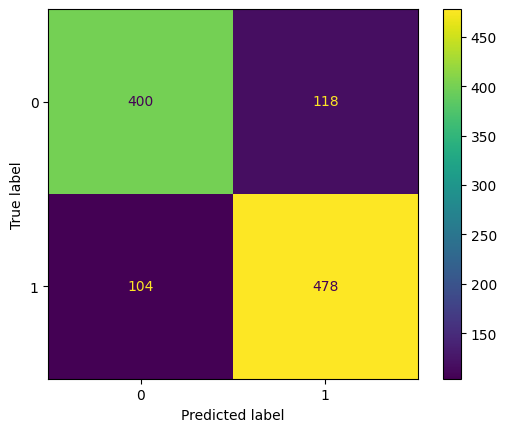

In [ ]:
dtc_analysis = deep_analysis(model = dtc, Y_train = Y_train, y_true = y_test )

The **DecisionTreeClassifier** recieved an accuracy score of 79%. Upon viewing this, I decided to look into the model more by looking at other metrics with my **deep_analysis** function and found that the **precison**, **recall** and **f1-score** are also 79%.

Not only that, but the **Confusion Matrix** is also showing some promising results since the diagonal values contains the highest prediction count in its respective rows which is nice. I do notice however that the model did predict the other values around 100 times each which is not the what i would want, but for a first attempt, this is pretty solid. Not my best peforming model, but not bad.

##Random Forest Classifier
Now I am going to test the results of a **RandomForestClassifier** and see if the accuracy has any imoprovement from the decision tree.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
#The RandomForestClassifier will have 100 decision trees
rfc = RandomForestClassifier(n_estimators = 100, random_state = 42)
#Will store the training history object
rfc_history = rfc.fit(X_train, x_test)

In [ ]:
rfc_preds = rfc.predict(Y_train)

Accuracy: 89.55% 
 Precision: 89.59% 
 Recall: 89.55% 
 F1-Score: 89.53% 



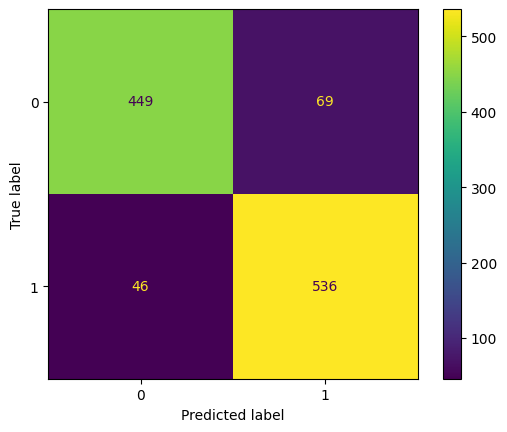

In [ ]:
#Now I will visualize the perfomance of the model
rfc_analysis = deep_analysis(model = rfc, Y_train = Y_train, y_true = y_test)

WOW!! It looks like the **RandomForestClassifier** perfomed the best out of the **DecisionTreeClassifier** and the **Deep learning models** that were constructed before it. I will test out the **RandomForestClassifer** by adding more **n_estimators** to see if the models performance imporves.

Accuracy: 89.36% 
 Precision: 89.38% 
 Recall: 89.36% 
 F1-Score: 89.35% 



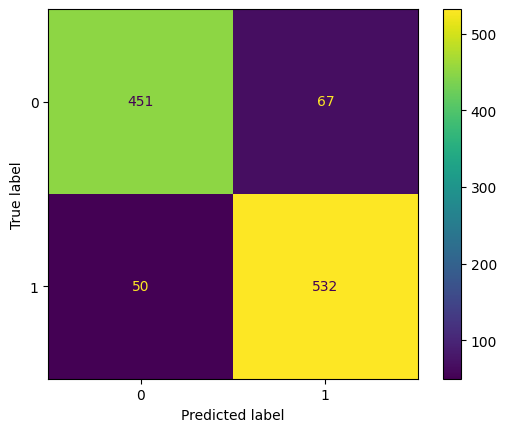

{'Accuracy': 89.36363636363637,
 'Precision': 89.38226324706787,
 'Recall': 89.36363636363637,
 'F1-Score': 89.35146601455571,
 'Confusion_matrix': array([[451,  67],
        [ 50, 532]]),
 'Confusion_matrix_display': <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x7ee426ff6890>}

In [ ]:
#The RandomForestClassifier will have 200 decision trees
rfc_v2 = RandomForestClassifier(n_estimators = 200, random_state = 42)
#Will store the training history object
rfc_v2.fit(X_train, x_test)
deep_analysis(model = rfc_v2, Y_train = Y_train, y_true = y_test)

Looks like **200 Decision Trees** in the **RandomForestClassifier** caused the model to perform slightly worse. Next I will use **GridSearchCV** to perform **hyperparameter optimization** during training so that the model can potentially reach a higher accuracy.

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators": [50, 100, 150, 175],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

rfc_v3 = RandomForestClassifier()
grid_search = GridSearchCV(rfc_v3, param_grid, cv=5)
grid_search.fit(X_train, x_test)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150, 175]})

In [ ]:
grid_search.best_params_

{'max_depth': 30,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 150}

Looks like the parameters that performed the best are:
* **max_depth:30**
* **min_samples_leaf:1**
* **min_samples_split:2**
* **n_estimators:150**
Now, I wil construct a **RandomForestClassifier** with these parameters and evaluate the models performance.

In [ ]:
rfc_4 = RandomForestClassifier(n_estimators = 150, max_depth = 30, min_samples_leaf = 1, min_samples_split = 2, random_state = 42)
rfc_4.fit(X_train, x_test)

RandomForestClassifier(max_depth=30, n_estimators=150, random_state=42)

Accuracy: 89.27% 
 Precision: 89.28% 
 Recall: 89.27% 
 F1-Score: 89.26% 



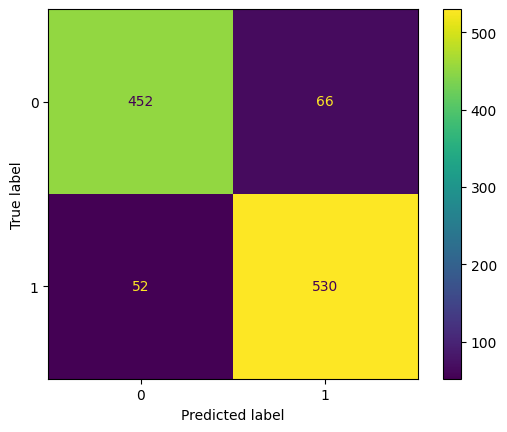

In [ ]:
rfc4_analysis = deep_analysis(model = rfc_4, Y_train = Y_train, y_true = y_test)

Accuracy: 89.27% 
 Precision: 89.28% 
 Recall: 89.27% 
 F1-Score: 89.26% 



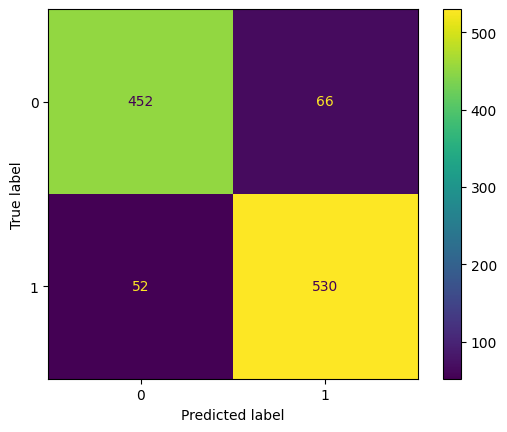

In [ ]:
rfc_5 = RandomForestClassifier(n_estimators = 150, random_state = 42)
rfc_5.fit(X_train, x_test)
rfc5_analysis = deep_analysis(model = rfc_5, Y_train = Y_train, y_true = y_test)

Accuracy: 89.27% 
 Precision: 89.29% 
 Recall: 89.27% 
 F1-Score: 89.26% 



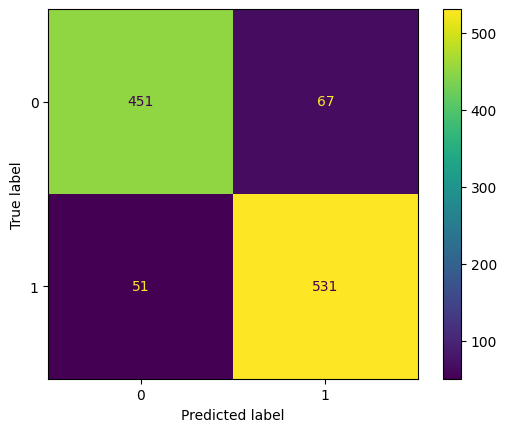

In [ ]:
rfc_6 = RandomForestClassifier(n_estimators = 132, random_state = 42)
rfc_6.fit(X_train, x_test)
rfc6_analysis = deep_analysis(model = rfc_6, Y_train = Y_train, y_true = y_test)

Accuracy: 89.64% 
 Precision: 89.67% 
 Recall: 89.64% 
 F1-Score: 89.62% 



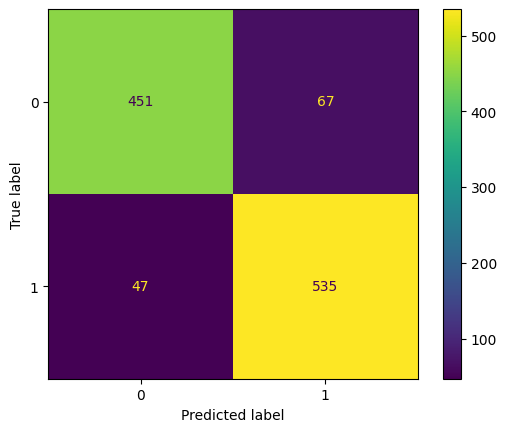

In [ ]:
rfc_7 = RandomForestClassifier(n_estimators = 90, random_state = 42)
rfc_7.fit(X_train, x_test)
rfc7_analysis = deep_analysis(model = rfc_7, Y_train = Y_train, y_true = y_test)

Accuracy: 88.91% 
 Precision: 88.94% 
 Recall: 88.91% 
 F1-Score: 88.89% 



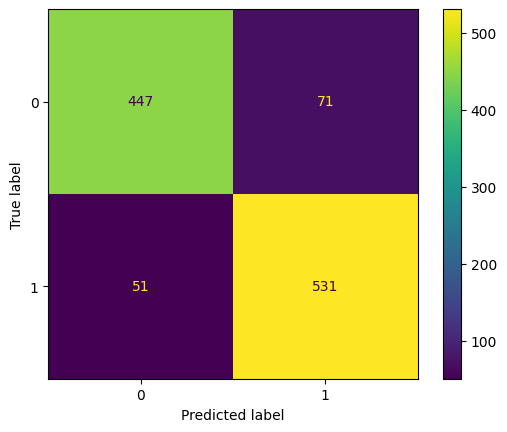

In [ ]:
rfc_8 = RandomForestClassifier(n_estimators = 80, random_state = 42)
rfc_8.fit(X_train, x_test)
rfc8_analysis = deep_analysis(model = rfc_8, Y_train = Y_train, y_true = y_test)

#Conclusion
Seems like the best models I can create so far via **deep learning** and **machine learning** cap off at 89%. Im noit satosfied with that so I will try to use a **support vector machine model** to see if it performs better.

Accuracy: 84.91% 
 Precision: 84.92% 
 Recall: 84.91% 
 F1-Score: 84.91% 



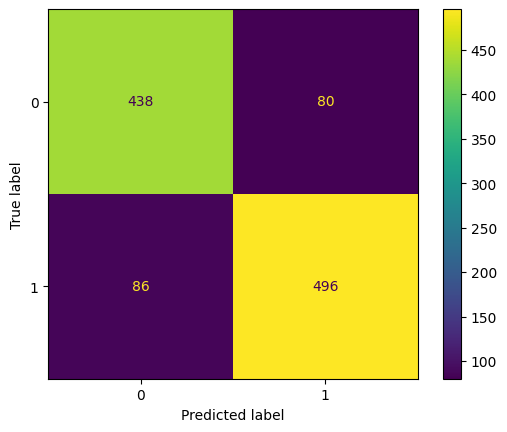

In [ ]:
from sklearn.svm import SVC

# Create the SVM classifier
svc = SVC(C=1.0, kernel='rbf', random_state=42)

# Fit the classifier to the training data
svc.fit(X_train, x_test)

# Perform a deep analysis of the classifier
svc_analysis = deep_analysis(model=svc, Y_train=Y_train, y_true=y_test)


Accuracy: 88.82% 
 Precision: 88.82% 
 Recall: 88.82% 
 F1-Score: 88.81% 



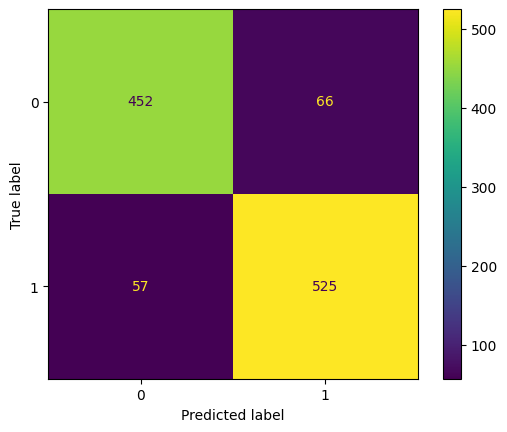

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Create an instance of KNeighborsClassifier
# Let's say we are using 5 neighbors for this example
knn_5 = KNeighborsClassifier(n_neighbors=5)

# Fit the model on the training data
# Assume X_train and Y_train are your training data and labels
knn_5.fit(X_train, x_test)

# Now you can use the trained model for analysis
# Assuming deep_analysis is a custom function you have for model evaluation
# and you have a test set named x_test and y_test
knn5_analysis = deep_analysis(model=knn_5, Y_train=Y_train, y_true=y_test)


Accuracy: 89.27% 
 Precision: 89.68% 
 Recall: 89.27% 
 F1-Score: 89.28% 



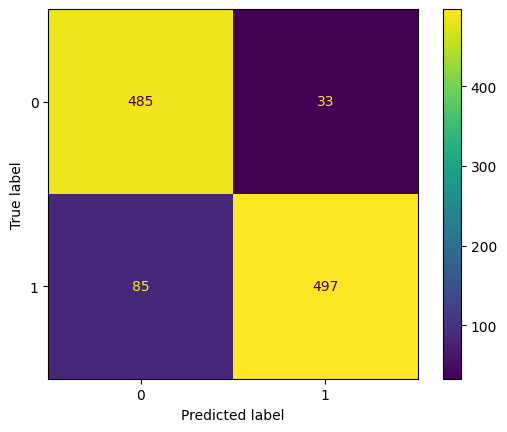

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Create an instance of KNeighborsClassifier
# Let's say we are using 5 neighbors for this example
knn_6 = KNeighborsClassifier(n_neighbors=6)

# Fit the model on the training data
# Assume X_train and Y_train are your training data and labels
knn_6.fit(X_train, x_test)

# Now you can use the trained model for analysis
# Assuming deep_analysis is a custom function you have for model evaluation
# and you have a test set named x_test and y_test
knn6_analysis = deep_analysis(model=knn_6, Y_train=Y_train, y_true=y_test)


Accuracy: 88.82% 
 Precision: 88.84% 
 Recall: 88.82% 
 F1-Score: 88.81% 



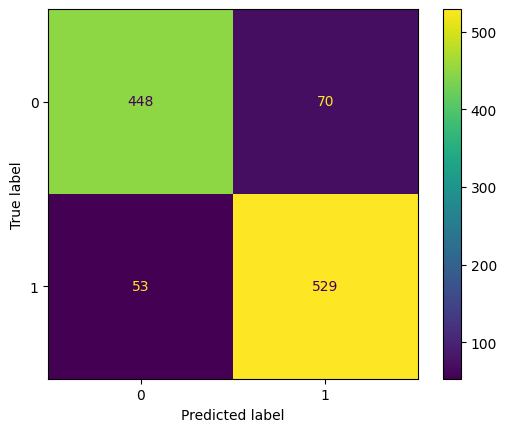

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Create an instance of KNeighborsClassifier
# Let's say we are using 5 neighbors for this example
knn_7 = KNeighborsClassifier(n_neighbors=7)

# Fit the model on the training data
# Assume X_train and Y_train are your training data and labels
knn_7.fit(X_train, x_test)

# Now you can use the trained model for analysis
# Assuming deep_analysis is a custom function you have for model evaluation
# and you have a test set named x_test and y_test
knn7_analysis = deep_analysis(model=knn_7, Y_train=Y_train, y_true=y_test)


#kNeighborsClassifier
Seems like 6 neighbors hold the best performance, still 89%......

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Assuming X_train, X_test, Y_train, y_test are already defined

# Create the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],  # number of boosting stages
    'learning_rate': [0.01, 0.1, 0.2],  # learning rate shrinks the contribution of each tree
    'max_depth': [3, 4, 5],  # maximum depth of the individual regression estimators
    'min_samples_split': [2, 4],  # minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2]  # minimum number of samples required to be at a leaf node
}

# Create a GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state=42)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=gb, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, x_test)

# Get the best estimator
best_gb = grid_search.best_estimator_

print(best_gb)


Fitting 3 folds for each of 108 candidates, totalling 324 fits
GradientBoostingClassifier(learning_rate=0.2, max_depth=5, n_estimators=300,
                           random_state=42)


In [ ]:
grid_search.best_params_

{'learning_rate': 0.2,
 'max_depth': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 300}

In [ ]:
gbc = GradientBoostingClassifier(learning_rate = 0.2, max_depth = 5,
                                 min_samples_leaf = 1, min_samples_split = 2, n_estimators = 300, random_state=42)
gbc.fit(X_train, x_test)

GradientBoostingClassifier(learning_rate=0.2, max_depth=5, n_estimators=300,
                           random_state=42)

Accuracy: 85.45% 
 Precision: 85.45% 
 Recall: 85.45% 
 F1-Score: 85.44% 



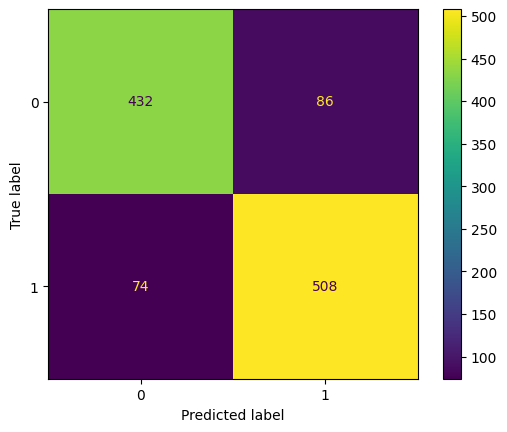

In [ ]:
gbc_analysis = deep_analysis(model = gbc, Y_train = Y_train, y_true = y_test)

In [ ]:
gbc2 = GradientBoostingClassifier(learning_rate = 0.2, max_depth = 5,
                                 min_samples_leaf = 1, min_samples_split = 2, n_estimators = 200, random_state=42)
gbc2.fit(X_train, x_test)

GradientBoostingClassifier(learning_rate=0.2, max_depth=5, n_estimators=200,
                           random_state=42)

Accuracy: 84.73% 
 Precision: 84.72% 
 Recall: 84.73% 
 F1-Score: 84.73% 



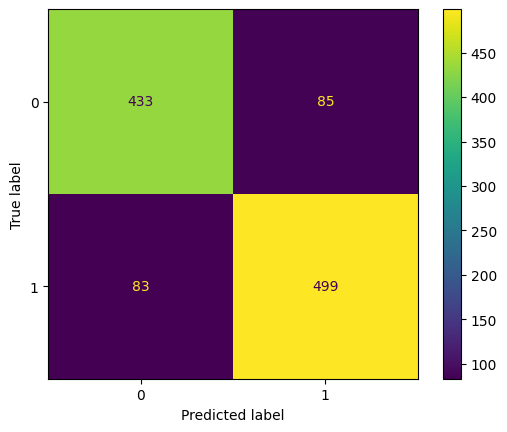

{'Accuracy': 84.72727272727273,
 'Precision': 84.72449004218676,
 'Recall': 84.72727272727273,
 'F1-Score': 84.72560059188285,
 'Confusion_matrix': array([[433,  85],
        [ 83, 499]]),
 'Confusion_matrix_display': <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x7bcff9b95210>}

In [ ]:
deep_analysis(model = gbc2, Y_train = Y_train, y_true = y_test)

In [ ]:
gbc3 = GradientBoostingClassifier(learning_rate = 0.2, max_depth = 5,
                                 min_samples_leaf = 1, min_samples_split = 2, n_estimators = 400, random_state=42)
gbc3.fit(X_train, x_test)

GradientBoostingClassifier(learning_rate=0.2, max_depth=5, n_estimators=400,
                           random_state=42)

Accuracy: 86.18% 
 Precision: 86.19% 
 Recall: 86.18% 
 F1-Score: 86.16% 



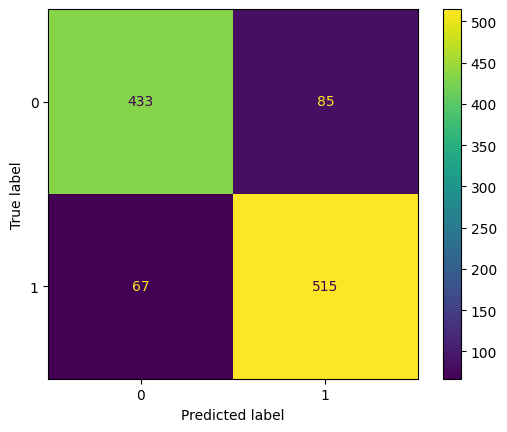

{'Accuracy': 86.18181818181819,
 'Precision': 86.19436363636362,
 'Recall': 86.18181818181819,
 'F1-Score': 86.16486809192722,
 'Confusion_matrix': array([[433,  85],
        [ 67, 515]]),
 'Confusion_matrix_display': <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x7bcff91089d0>}

In [ ]:
deep_analysis(model = gbc3, Y_train = Y_train, y_true = y_test)

In [ ]:
gbc4 = GradientBoostingClassifier(learning_rate = 0.2, max_depth = 5,
                                 min_samples_leaf = 1, min_samples_split = 2, n_estimators = 600, random_state=42)
gbc4.fit(X_train, x_test)

GradientBoostingClassifier(learning_rate=0.2, max_depth=5, n_estimators=600,
                           random_state=42)

Accuracy: 86.36% 
 Precision: 86.38% 
 Recall: 86.36% 
 F1-Score: 86.34% 



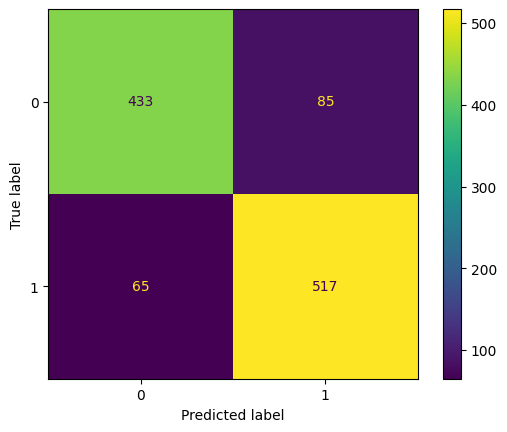

{'Accuracy': 86.36363636363636,
 'Precision': 86.38304349988294,
 'Recall': 86.36363636363636,
 'F1-Score': 86.34459217628508,
 'Confusion_matrix': array([[433,  85],
        [ 65, 517]]),
 'Confusion_matrix_display': <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x7bcff9b512a0>}

In [ ]:
deep_analysis(model = gbc4, Y_train = Y_train, y_true = y_test)

#Synopsis
The **RandomForestClassifier** performed the best out of all the models tested. 89% accuracy seems to be the peak of this project. Will create the model and make my final predictions.

In [ ]:
final_model = RandomForestClassifier(n_estimators = 100, random_state =42)
final_model.fit(X_train, x_test)

RandomForestClassifier(random_state=42)

Accuracy: 87.27% 
 Precision: 87.29% 
 Recall: 87.27% 
 F1-Score: 87.26% 



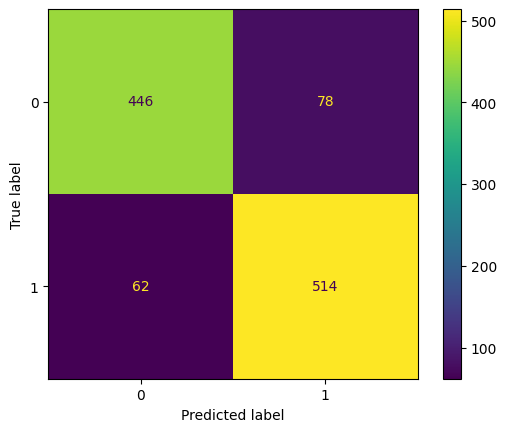

{'Accuracy': 87.27272727272727,
 'Precision': 87.28685020023603,
 'Recall': 87.27272727272727,
 'F1-Score': 87.26123934470542,
 'Confusion_matrix': array([[446,  78],
        [ 62, 514]]),
 'Confusion_matrix_display': <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x7bd080c2b400>}

In [ ]:
deep_analysis(model = final_model, Y_train = Y_train, y_true = y_test)

In [ ]:
final_model2 = RandomForestClassifier(n_estimators = 200, random_state =42)
final_model2.fit(X_train, x_test)

RandomForestClassifier(n_estimators=200, random_state=42)

Accuracy: 87.36% 
 Precision: 87.38% 
 Recall: 87.36% 
 F1-Score: 87.35% 



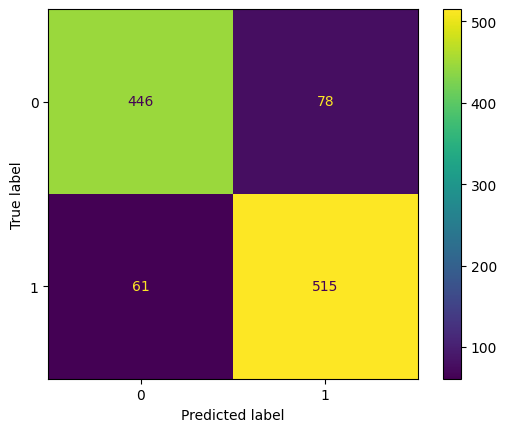

{'Accuracy': 87.36363636363636,
 'Precision': 87.38097479983587,
 'Recall': 87.36363636363636,
 'F1-Score': 87.35133801074083,
 'Confusion_matrix': array([[446,  78],
        [ 61, 515]]),
 'Confusion_matrix_display': <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x7bcff6e37c10>}

In [ ]:
deep_analysis(model = final_model2, Y_train = Y_train, y_true = y_test)

In [ ]:
column_names = ['Column1', 'Column2', 'Column3', 'Column4', 'Column5']
#Load in the hidden dataset and make my predictions
hidden_data = pd.read_csv("/content/a1_test.csv.txt", names = column_names)
hidden_data.head(), X_train.head()

(   Column1  Column2  Column3  Column4  Column5
 0     0.95     0.59     0.12     0.22     0.69
 1     0.15     0.52     0.66     0.63     0.74
 2     0.57     0.34     0.02     0.63     0.81
 3     0.12     0.39     0.91     0.89     0.08
 4     0.44     0.10     0.69     0.78     0.40,
       Column1  Column2  Column3  Column4  Column5
 4842     0.43     0.03     0.54     0.24     0.51
 1952     0.01     0.63     0.03     0.24     0.87
 8097     0.26     0.87     0.16     0.08     0.39
 713      0.97     0.93     0.24     0.83     0.39
 1579     0.14     0.79     0.78     0.70     0.11)

In [ ]:
final_predictions = final_model.predict(hidden_data)
final_predictions

array([0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,

In [ ]:
results = "01101110100011101100101010011001111111101110001111, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0"

In [ ]:
from sklearn.ensemble import RandomForestClassifier
#The RandomForestClassifier will have 100 decision trees
forestMode = RandomForestClassifier(n_estimators = 175, random_state = 42)
#Will store the training history object
forest_history = forestMode.fit(X_train, x_test)

In [ ]:
forest_preds = forestMode.predict(Y_train)
forest_preds

array([1, 0, 0, ..., 0, 0, 1])

Accuracy: 87.36% 
 Precision: 87.40% 
 Recall: 87.36% 
 F1-Score: 87.35% 



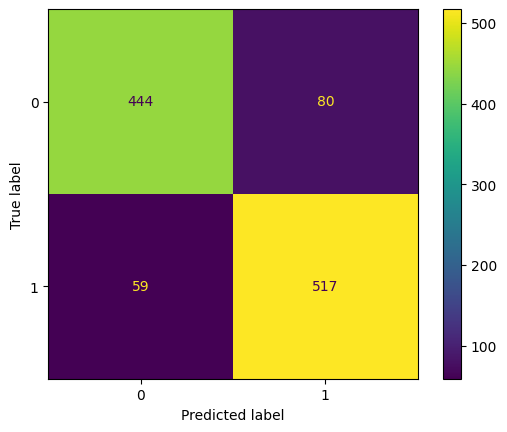

{'Accuracy': 87.36363636363636,
 'Precision': 87.39553178871041,
 'Recall': 87.36363636363636,
 'F1-Score': 87.34755600189897,
 'Confusion_matrix': array([[444,  80],
        [ 59, 517]]),
 'Confusion_matrix_display': <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x7e9f540b8c10>}

In [ ]:
deep_analysis(model = forestMode, Y_train = Y_train, y_true = y_test)

Accuracy: 91.36% 
 Precision: 91.36% 
 Recall: 91.36% 
 F1-Score: 91.36% 



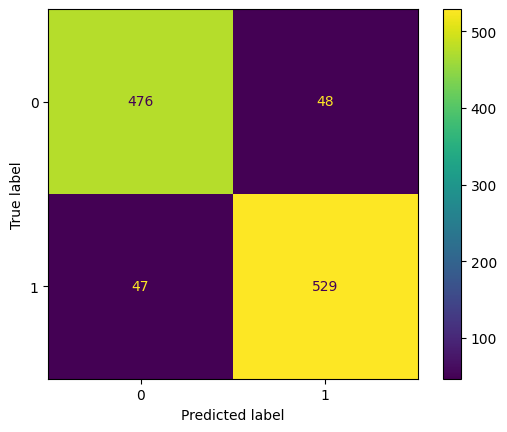

In [ ]:
from sklearn.svm import SVC

# Create the SVM classifier
svc_2 = SVC(C=2000, kernel='rbf', random_state=42)

# Fit the classifier to the training data
svc_2.fit(X_train, x_test)

# Perform a deep analysis of the classifier
svc_analysis_2 = deep_analysis(model=svc_2, Y_train=Y_train, y_true=y_test)

Accuracy: 91.09% 
 Precision: 91.11% 
 Recall: 91.09% 
 F1-Score: 91.09% 



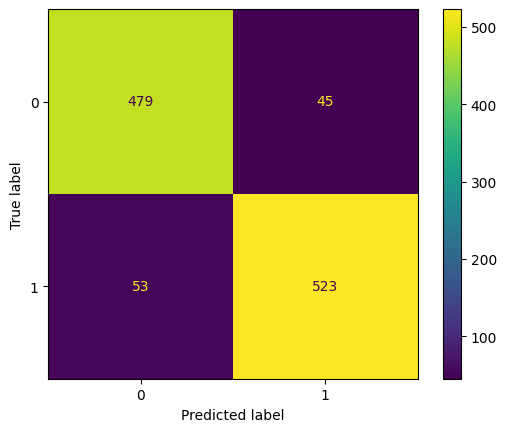

In [ ]:
from sklearn.svm import SVC

# Create the SVM classifier
svc_3 = SVC(C=1000, kernel='rbf', random_state=42)

# Fit the classifier to the training data
svc_3.fit(X_train, x_test)

# Perform a deep analysis of the classifier
svc_analysis_3 = deep_analysis(model=svc_3, Y_train=Y_train, y_true=y_test)

In [ ]:
svc_3.predict(hidden_data)

array([0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,